# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + cities[i] + "&appid=" + weather_api_key + "&units=imperial"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | uturoa
Processing Record 2 of Set 1 | kailua-kona
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | ujae
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | papatowai
Processing Record 7 of Set 1 | wailua homesteads
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | carnarvon
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | west island
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | isafjordur
Processing Record 14 of Set 1 | merowe
Processing Record 15 of Set 1 | geiro
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | tommot
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | soto la marina
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | gremda
Pr

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,uturoa,-16.7333,-151.4333,75.87,74,96,17.00,PF,1722738831
1,kailua-kona,19.6406,-155.9956,84.16,84,40,10.36,US,1722739023
2,jamestown,42.0970,-79.2353,71.19,97,37,1.01,US,1722738748
3,ujae,8.9322,165.7642,83.46,75,22,8.43,MH,1722739026
4,edinburgh of the seven seas,-37.0676,-12.3116,54.79,84,100,35.43,SH,1722739028


In [6]:
# Export the City_Data into a csv
import os

# Create the output directory if it doesn't exist
if not os.path.exists("output_data"):
    os.makedirs("output_data")

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,uturoa,-16.7333,-151.4333,75.87,74,96,17.00,PF,1722738831
1,kailua-kona,19.6406,-155.9956,84.16,84,40,10.36,US,1722739023
2,jamestown,42.0970,-79.2353,71.19,97,37,1.01,US,1722738748
3,ujae,8.9322,165.7642,83.46,75,22,8.43,MH,1722739026
4,edinburgh of the seven seas,-37.0676,-12.3116,54.79,84,100,35.43,SH,1722739028


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

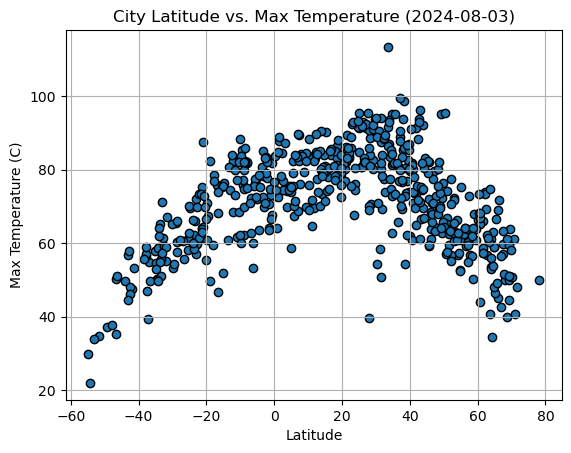

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="k")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-08-03)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

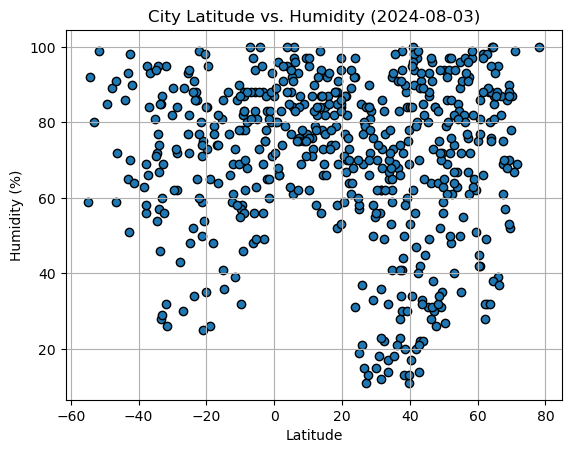

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="k")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-08-03)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

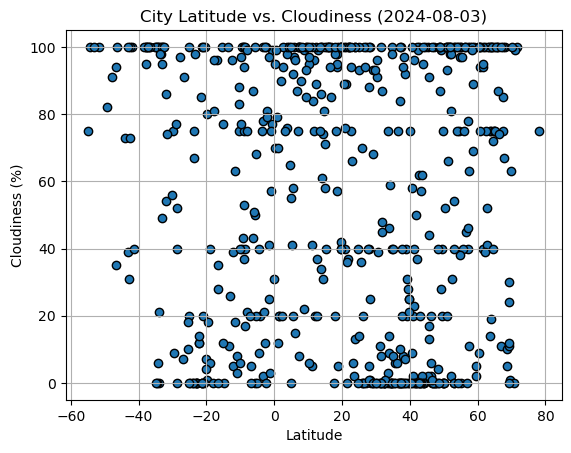

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="k")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-08-03)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

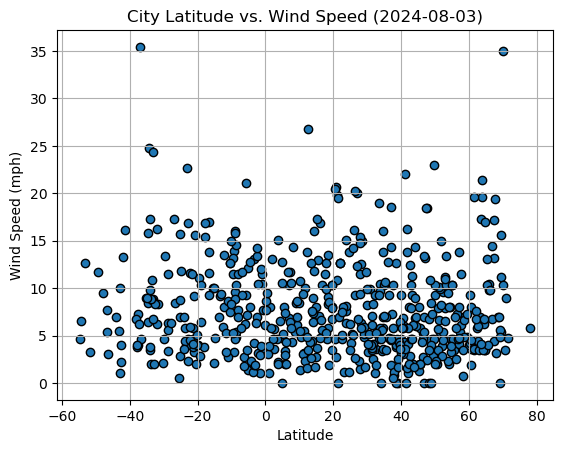

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="k")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-08-03)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
def linregress_plot(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    print(f"The r-value is: {r_value}")

    x_reg = np.linspace(np.min(x), np.max(x), 100)
    y_reg = slope * x_reg + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    plt.figure(figsize=(7, 5))
    # Convert column names to strings explicitly for title
    plt.title(x.name + " vs " + y.name)
    plt.scatter(x, y)
    plt.plot(x_reg, y_reg, color='red', linestyle='--')
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.annotate(line_eq, (x.min(), y.max()-2), color='red', fontsize=14)
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.rename(columns={"Lat": "Latitude"})
northern_hemi_df = northern_hemi_df[northern_hemi_df["Latitude"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Latitude,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kailua-kona,19.6406,-155.9956,84.16,84,40,10.36,US,1722739023
2,jamestown,42.0970,-79.2353,71.19,97,37,1.01,US,1722738748
3,ujae,8.9322,165.7642,83.46,75,22,8.43,MH,1722739026
6,wailua homesteads,22.0669,-159.3780,83.19,73,100,12.66,US,1722739031
7,bethel,41.3712,-73.4140,73.71,90,40,0.00,US,1722739032


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.rename(columns={"Lat": "Latitude"})
southern_hemi_df = southern_hemi_df[southern_hemi_df["Latitude"] >= 0]

# Display sample data
southern_hemi_df.head()

,City,Latitude,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kailua-kona,19.6406,-155.9956,84.16,84,40,10.36,US,1722739023
2,jamestown,42.0970,-79.2353,71.19,97,37,1.01,US,1722738748
3,ujae,8.9322,165.7642,83.46,75,22,8.43,MH,1722739026
6,wailua homesteads,22.0669,-159.3780,83.19,73,100,12.66,US,1722739031
7,bethel,41.3712,-73.4140,73.71,90,40,0.00,US,1722739032


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5998888118403026


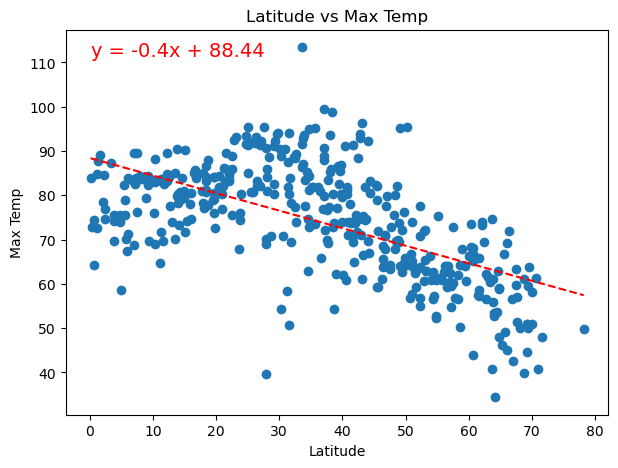

In [15]:
# Linear regression on Northern Hemisphere
linregress_plot(northern_hemi_df["Latitude"], northern_hemi_df["Max Temp"])

The r-value is: -0.5998888118403026


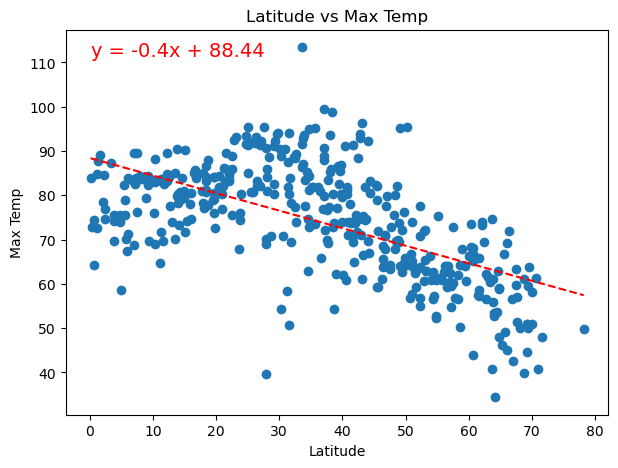

In [16]:
# Linear regression on Southern Hemisphere
linregress_plot(southern_hemi_df["Latitude"], southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** The r-value for both northern and southern hemispheres indicate a strong correlation between Latitude and Max Temp. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.10523915853024489


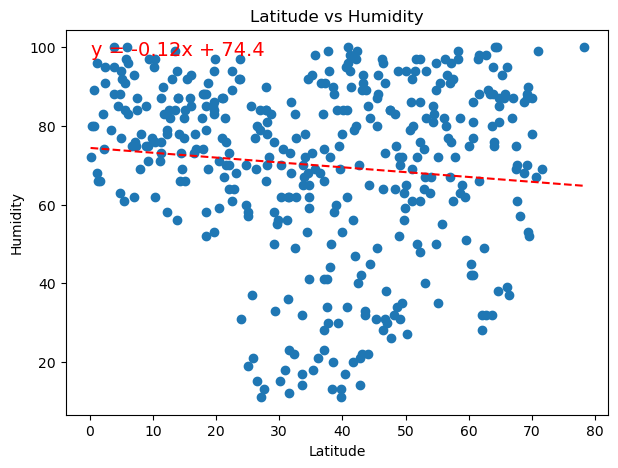

In [17]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Latitude"], northern_hemi_df["Humidity"])

The r-value is: -0.10523915853024489


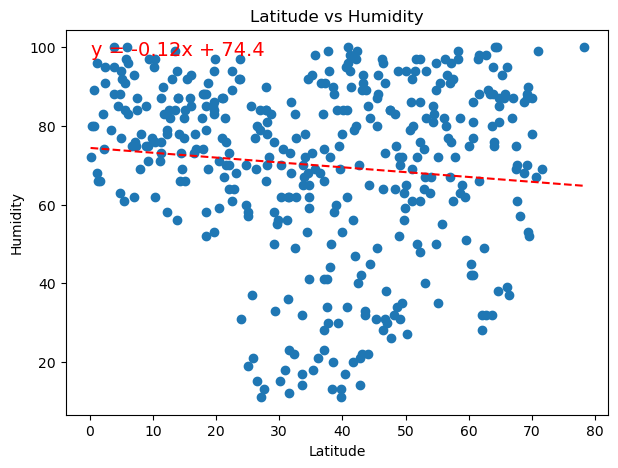

In [18]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Latitude"], southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** Based on the r-values, there may be a small correlation between Latitude and Humidity, especially in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.07923263602436427


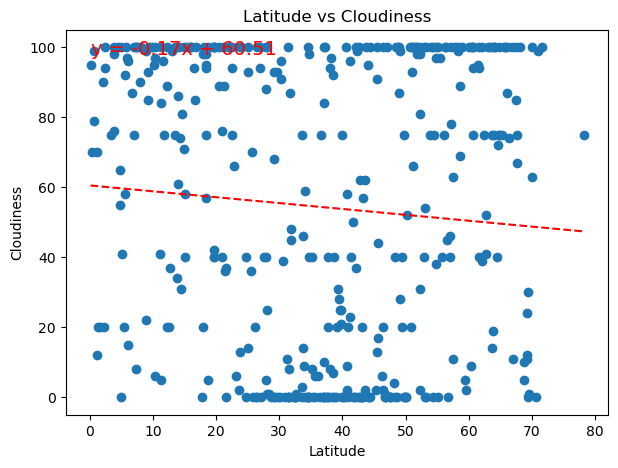

In [19]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Latitude"], northern_hemi_df["Cloudiness"])

The r-value is: -0.07923263602436427


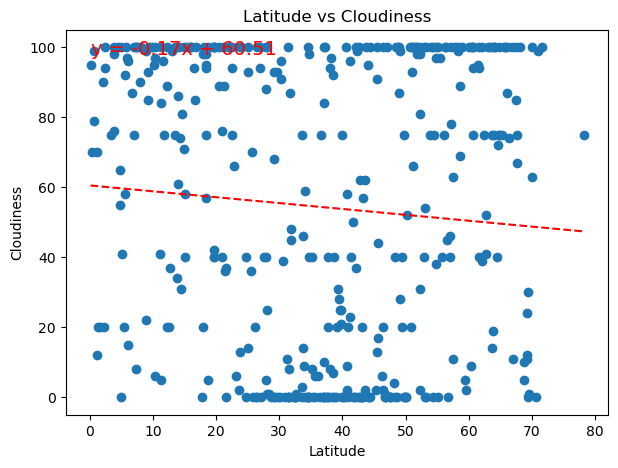

In [20]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Latitude"], southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** There does not appear to be any correlation between Latitude and Cloudiness in either hemisphere. While the r-value is stronger for the southern hemisphere, the slope of the line does not support a correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0012341125825537532


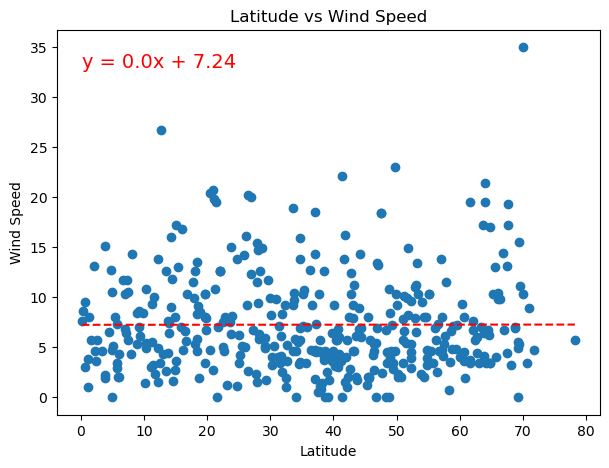

In [21]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Latitude"], northern_hemi_df["Wind Speed"])

The r-value is: 0.0012341125825537532


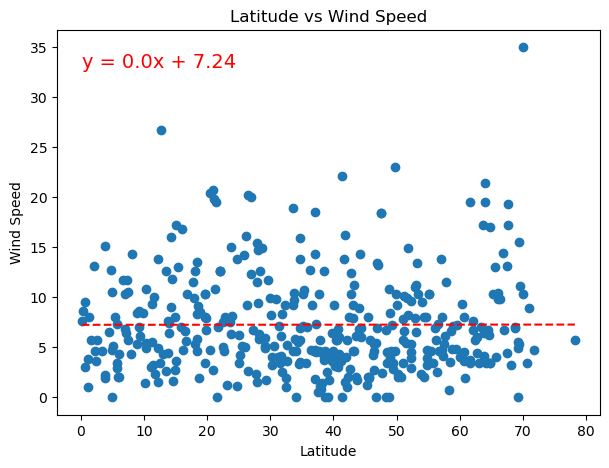

In [22]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Latitude"], southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** There appears to be no correlation between wind speed and latitude in either hemisphere.